In [1]:
!git clone https://github.com/jwolosiuk/rnn_drug_names_generator

In [2]:
%cd rnn_drug_names_generator

In [ ]:
!pip install -r requirements.txt

In [4]:
from preprocessing import get_names
names = dataset = get_names()

In [5]:
names[:10]

['octaplex',
 'nobilis ms live',
 'fiprex s',
 'frontline combo spot-on dla psów l',
 'voriconazole mylan',
 'biocan b ',
 'tagrisso',
 'angeliq',
 'febrivac dist liofilizat + rozpuszczalnik do sporządzania zawiesiny do wstrzykiwań',
 'biofazolin']

Model architecture is one embeddings layer, one LSTM layer and one fully connected layer. 
It is known and simple architecture for not complicated text generation problems.

In [6]:
from training import get_trained_model

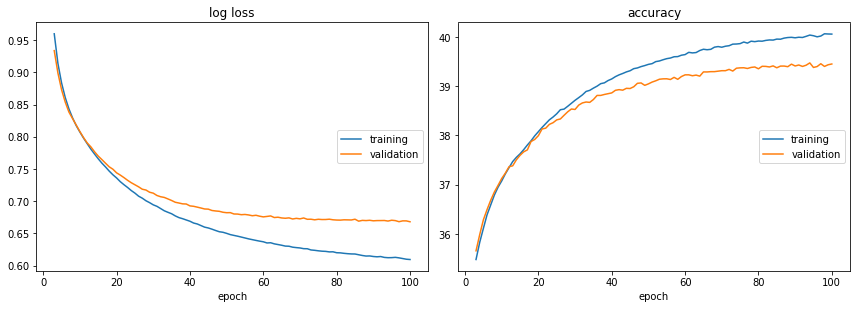

log loss:
training   (min:    0.610, max:    1.638, cur:    0.610)
validation (min:    0.668, max:    1.076, cur:    0.668)

accuracy:
training   (min:   33.150, max:   40.068, cur:   40.062)
validation (min:   34.532, max:   39.476, cur:   39.454)


In [32]:
embbeddings_size, hidden_layer_size, lr = 8, 48, 0.005
model = get_trained_model(embbeddings_size, hidden_layer_size, lr)

Many parameters were tested, and following were chosen, because they achieve satisfacting accuracy and don't overfit too much. Overfitting is visible, but it is not bad in the case as it increases power of the metric shown below, which differentiates between drug names and other words.

For every drug name we can generate probability of the name being produced by the model.
It's a simple metric to check 'how far' the name is from being a drug name.

In [33]:
from task import generate_name, analyze_name

In [34]:
for T in [1, 5, 0.2]:
    print('temperature', T)
    for i in range(5):
        name = generate_name(model, temp=T)
        print('\t', end='')
        analyze_name(name, model, temp=T)

temperature 1
	stramelcegana ma (NIEISTNIEJE), probability: 3.80E-15
	salilgaz (NIEISTNIEJE), probability: 1.46E-09
	risestatik 20 (NIEISTNIEJE), probability: 3.38E-12
	korepidum 5% kwiuroletizidoss evica vita 50 colaph (NIEISTNIEJE), probability: 3.40E-46
	prosoxym (NIEISTNIEJE), probability: 6.68E-08
temperature 5
	n)–ao (NIEISTNIEJE), probability: 1.70E-09
	rrkó.4tm/0)p,,/hd9ł.oz.byy (NIEISTNIEJE), probability: 6.61E-46
	qakam (NIEISTNIEJE), probability: 2.86E-08
	t4neiry7ei1&2°m (NIEISTNIEJE), probability: 7.07E-27
	ex)3, (NIEISTNIEJE), probability: 5.80E-10
temperature 0.2
	metafen complex (NIEISTNIEJE), probability: 3.67E-03
	contract 100 mg/ml roztwór do wstrzykiwań dla psów (NIEISTNIEJE), probability: 2.47E-03
	cardesen (NIEISTNIEJE), probability: 1.04E-02
	contracta max (NIEISTNIEJE), probability: 1.69E-05
	trimesta (NIEISTNIEJE), probability: 1.33E-02


In [35]:
to_analyze = ['ibuprom', 'biomedal', 'urahara', 'umpa lumpasy', 'słowo', 'powerbank',
              'liść laurowy', 'liść pokrzywy', 'sascvdda sqa', 'biomagnal'] + names[:3]

In [36]:
for name in to_analyze:
    analyze_name(name, model, temp=0.2)

ibuprom (ISTNIEJE), probability: 3.69E-05
biomedal (NIEISTNIEJE), probability: 1.04E-16
urahara (NIEISTNIEJE), probability: 1.85E-33
umpa lumpasy (NIEISTNIEJE), probability: 6.40E-78
słowo (NIEISTNIEJE), probability: 2.11E-31
powerbank (NIEISTNIEJE), probability: 7.85E-47
liść laurowy (NIEISTNIEJE), probability: 5.89E-44
liść pokrzywy (ISTNIEJE), probability: 1.64E-29
sascvdda sqa (NIEISTNIEJE), probability: 7.42E-83
biomagnal (NIEISTNIEJE), probability: 1.47E-39
octaplex (ISTNIEJE), probability: 5.82E-26
nobilis ms live (ISTNIEJE), probability: 1.07E-38
fiprex s (ISTNIEJE), probability: 1.56E-07
